In [1]:
from wgangp.db_utils import *
from acf_utils import *
from utility import *

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorf

In [4]:
run = 1
number = 9999

In [5]:
path = f'/scratch/scarpolini/lagrangian/wgangp3/runs/{run}/{number}_gen.h5'
gen = load_model(path)
trajs = gen.predict(np.random.normal(0, 1, size=(50000, 100)))
np.save(f'wgangp3/runs/{run}/gen_trajs_{number}', trajs)

W0606 16:23:31.347722 47428952731136 deprecation.py:506] From /usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/keras/initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0606 16:23:31.350895 47428952731136 deprecation.py:506] From /usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0606 16:23:31.412024 47428952731136 deprecation.py:506] From /usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling Ones.__init__ (fr

In [9]:
path = f'/scratch/scarpolini/lagrangian/wgangp3/runs/{run}/gen_trajs_{number}.npy'
gen = np.load(path)[:,:,0:1]

M = gen.max()
m = gen.min()
print('massimo, minimo: ',M,m)

#db = np.load('/scratch/scarpolini/databases/velocities.npy')[:,:,0]
#M = db.max() 
M = 10.273698864467972
#m = db.min()
m = -9.970374739869616
semidisp = (M-m)/2.
media = (M+m)/2.
gen = gen*semidisp + media
print('veri',M,m)
M = gen.max()
m = gen.min()
print('generati',M,m)

massimo, minimo:  0.81060064 -0.7733149
veri 10.273698864467972 -9.970374739869616
generati 8.356591 -7.67586


# PDF V_x e A_x

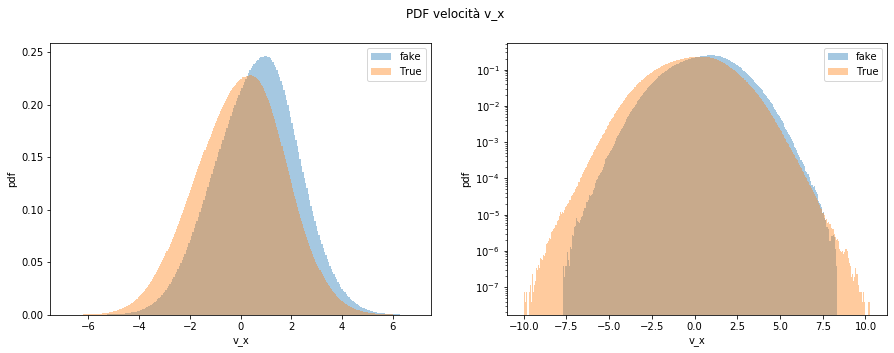

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('PDF velocità v_x')
hist, bin_edges = load_pdf('data/pdf_vx')
ax1.hist(gen.flatten(), bins=300, label='fake', alpha=0.4, density=True)
ax1.hist(bin_edges[:-1], bin_edges, weights=hist, alpha=0.4, label='True')
ax1.set_xlabel('v_x')
ax1.set_ylabel('pdf')
ax1.set_xlim([-7.5,7.5])
ax1.legend()
ax2.hist(gen.flatten(), bins=300, label='fake', alpha=0.4, density=True)
ax2.hist(bin_edges[:-1], bin_edges, weights=hist, alpha=0.4, label='True')
ax2.set_xlabel('v_x')
ax2.set_ylabel('pdf')
ax2.legend()
ax2.set_yscale('log')

fig.savefig(f'plots/gan_test_d0_{run}_{number}.png', fmt='png', dpi=100)
plt.show()

In [11]:
gm = np.gradient(gen,axis=1)

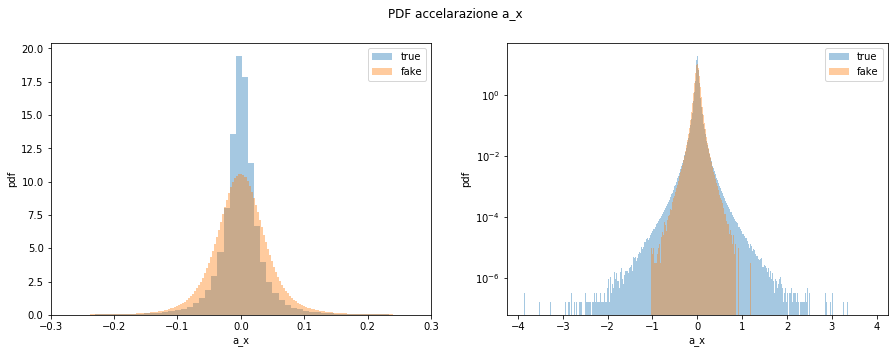

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('PDF accelarazione a_x')
hist, bin_edges = load_pdf('data/pdf_ax')

ax1.hist(bin_edges[:-1], bin_edges, weights=hist, alpha=0.4, label='true')
ax1.hist(gm.flatten(), bins=800, label='fake', alpha=0.4, density=True)
ax1.legend()
ax1.set_xlabel('a_x')
ax1.set_ylabel('pdf')
ax1.set_xlim([-0.3,0.3])

ax2.hist(bin_edges[:-1], bin_edges, weights=hist, alpha=0.4, label='true')
ax2.hist(gm.flatten(), bins=800, label='fake', alpha=0.4, density=True)
ax2.legend()
ax2.set_xlabel('a_x')
ax2.set_ylabel('pdf')
ax2.set_yscale('log')

fig.savefig(f'plots/gan_test_d1_{run}_{number}.png', fmt='png', dpi=100)
plt.show()

# ACF_x

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


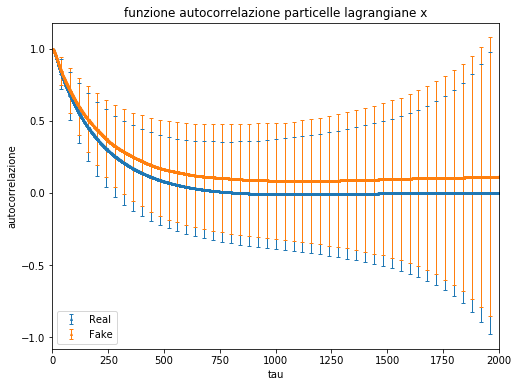

In [13]:
mean = np.load('../databases/velocities_acf_mean_and_std.npy')[0,:,0]
std = np.load('../databases/velocities_acf_mean_and_std.npy')[1,:,0]
plt.figure(figsize=(8,6))
l, caps, c = plt.errorbar(np.arange(2000), mean, std, lw=0, marker='^', errorevery=40,
                          ms=2, elinewidth=1, uplims=True, lolims=True, capsize=2, label='Real')
for cap in caps:
    cap.set_marker("_")

try: acfs = np.load(f'data/acf_x_gen_{run}_{number}.npy')
except:
    acfs = acf_gen_x(gen)
    np.save(f'data/acf_x_gen_{run}_{number}',acfs)
    
mean = acfs.mean(axis=0)
std = acfs.std(axis=0)
l, caps, c = plt.errorbar(np.arange(2000), mean, std, lw=0, marker='^', errorevery=40,
                          ms=2, elinewidth=1, uplims=True, lolims=True, capsize=2, label='Fake')
for cap in caps:
    cap.set_marker("_")

plt.title('funzione autocorrelazione particelle lagrangiane x')
plt.xlim([0,2000])
plt.xlabel('tau')
plt.legend()
plt.ylabel('autocorrelazione')
plt.savefig(f'plots/gan_test_acfx_{run}_{number}.png', fmt='png', dpi=100)
plt.show()

# Exit time

In [14]:
paths = [f'data/acf_x_gen_{run}_{number}.npy']
try: exit_times = np.load(f'data/exit_time_x_gen_{run}_{number}.npy')
except:
    exit_times = gen_exit_time(run, number, 0.5)
    np.save(f'data/exit_time_x_gen_{run}_{number}',exit_times)

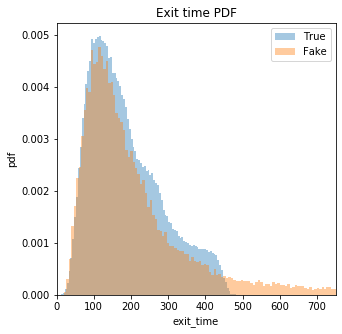

In [15]:
plt.figure(figsize=(5,5))
#exit_times = np.load('../databases/exit_time_0.50_lagrangian.npy')
#hist, bin_edges = np.histogram(exit_times,bins=100, density=True)
#print(save_pdf(bin_edges, hist, 'data/pdf_exit_time'))
hist, bin_edges = load_pdf('data/pdf_exit_time')
plt.hist(bin_edges[:-1], bin_edges, weights=hist, alpha=0.4, label='True')
plt.hist(exit_times, bins=300, alpha=0.4, label='Fake', density=True)
#plt.yscale('log')
plt.title('Exit time PDF')
plt.ylabel('pdf')
plt.xlabel('exit_time')
plt.xlim([0,750])
plt.legend()
plt.savefig(f'plots/gan_test_exit_time_{run}_{number}.png',fmt='png',dpi=100)

# Plot Traiettorie Generate e Reali

In [16]:
db = np.load('../databases/velocities.npy')[:,:,0]

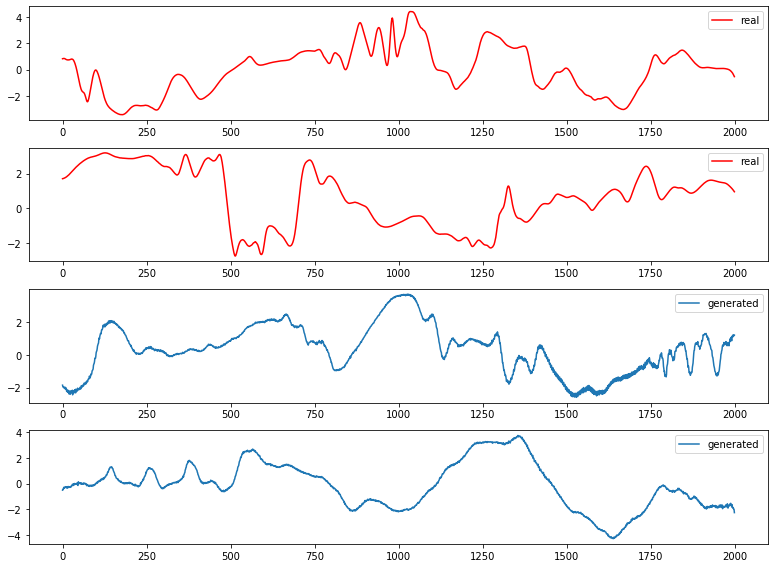

In [17]:
idx1 = np.random.randint(0, db.shape[0], 2)
idx2 = np.random.randint(0, gen.shape[0], 2)
trajs = db[idx1]
gen_trajs = gen[idx2]
plt.figure(figsize=(11, 2*len(trajs)+2*len(gen_trajs)))
plt.title('esempi di traiettorie vere e generate')

for i, traj in enumerate(trajs):
    plt.subplot(len(trajs)+len(gen_trajs), 1, i+1)
    plt.plot(traj, color='red', label='real')
    plt.legend()

for i, traj in enumerate(gen_trajs):
    plt.subplot(len(trajs)+len(gen_trajs), 1, i+1+len(trajs))
    plt.plot(traj, label='generated')
    plt.legend()

plt.tight_layout()
plt.savefig(f'plots/gan_test_trajs_{run}_{number}.png', fmt='png', dpi=100)
plt.show()

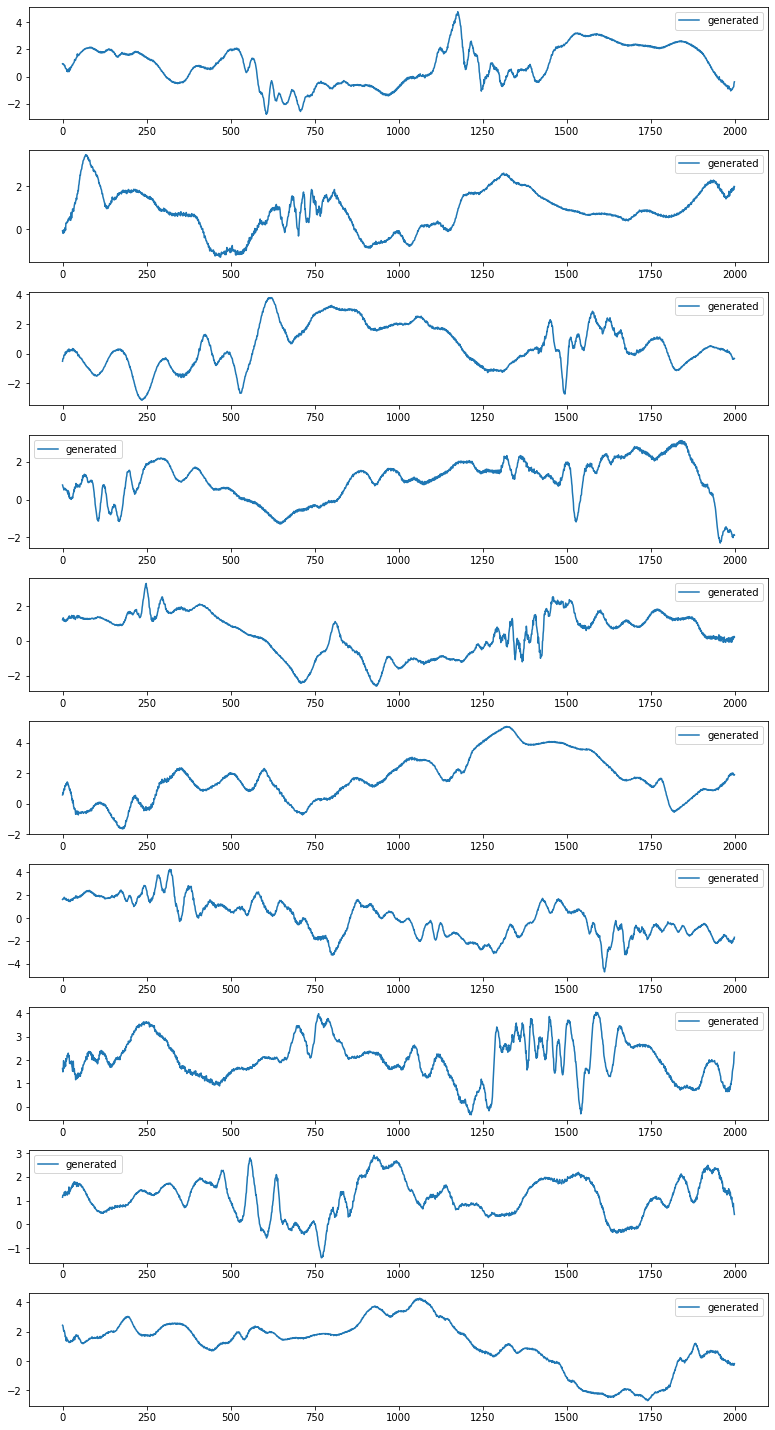

In [18]:
idx2 = np.random.randint(0, gen.shape[0],10)
gen_trajs = gen[idx2]
plt.figure(figsize=(11,2*len(gen_trajs)))
plt.title('esempi di traiettorie generate')

for i, traj in enumerate(gen_trajs):
    plt.subplot(len(gen_trajs), 1, i+1)
    plt.plot(traj, label='generated')
    plt.legend()

plt.tight_layout()
plt.savefig(f'plots/gan_test_gen_trajs_{run}_{number}.png', fmt='png', dpi=100)
plt.show()

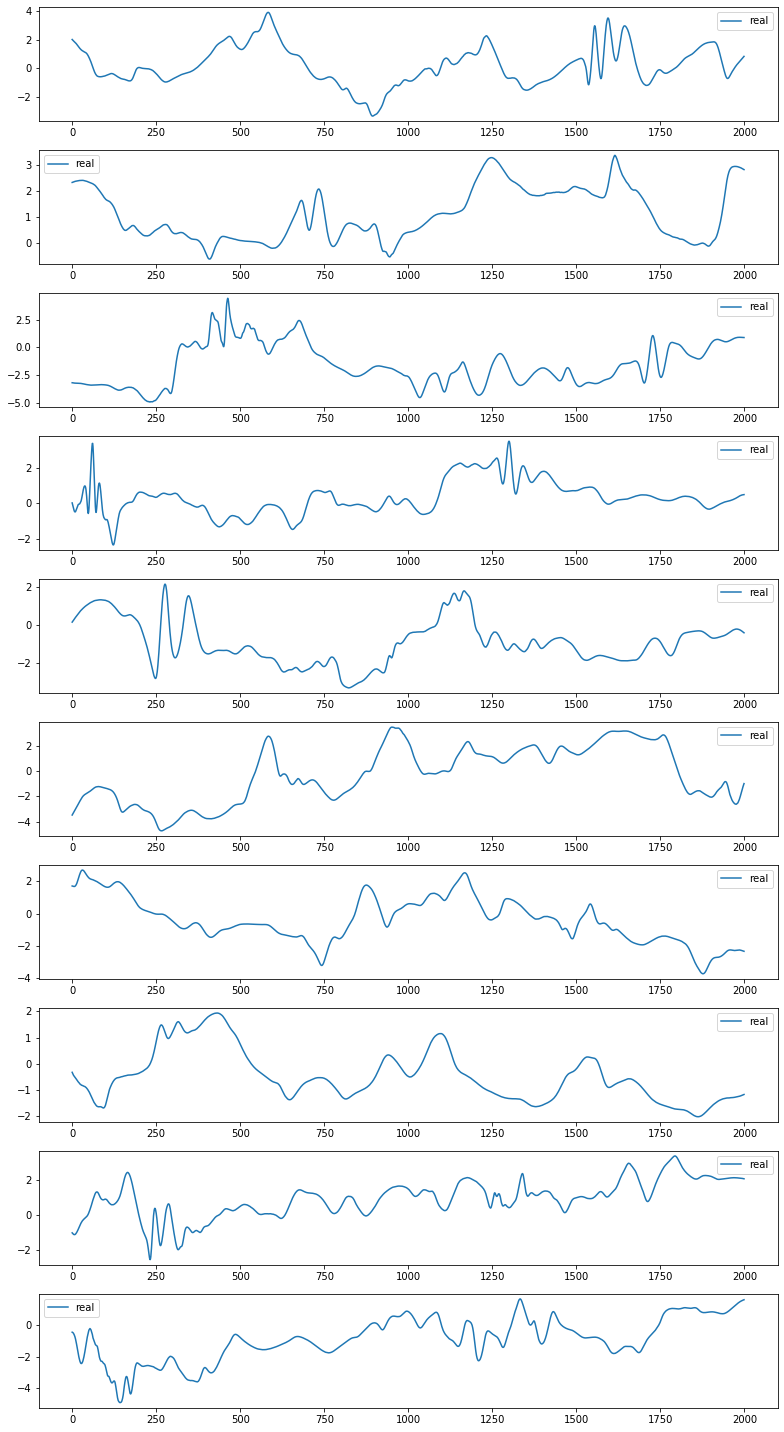

In [19]:
idx1 = np.random.randint(0, db.shape[0],10)
trajs = db[idx1]
plt.figure(figsize=(11,2*len(trajs)))
plt.title('esempi di traiettorie reali')

for i, traj in enumerate(trajs):
    plt.subplot(len(trajs), 1, i+1)
    plt.plot(traj, label='real')
    plt.legend()

plt.tight_layout()
plt.savefig(f'plots/real_trajs.png', fmt='png', dpi=100)
plt.show()